In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [4]:
faces = fetch_lfw_people()
positive_patches = faces.images

In [5]:
num_positive_samples = len(positive_patches)
print("Q1: Number of positive samples in positive_patches =", num_positive_samples)

Q1: Number of positive samples in positive_patches = 368


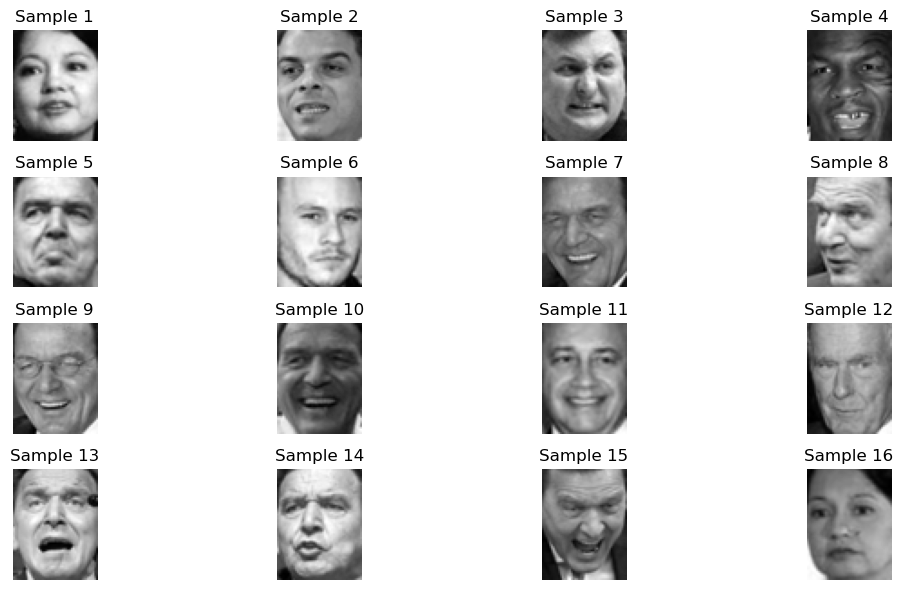

In [6]:
plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(positive_patches[i], cmap='gray')
    plt.title(f"Sample {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, feature, data, transform
from sklearn.feature_extraction.image import PatchExtractor

C:\Users\dell\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, feature, data, transform
from sklearn.feature_extraction.image import PatchExtractor

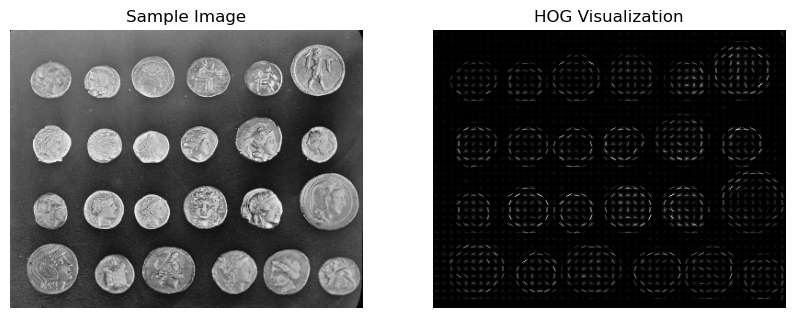

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, data
from sklearn.feature_extraction.image import PatchExtractor

# Load a sample grayscale image (e.g., 'coins')
sample_image = data.coins()

# Q3: Compute HOG features and visualize the oriented gradients
hog_vec, hog_vis = feature.hog(sample_image, visualize=True)

# Display the original image and its HOG visualization
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(sample_image, cmap='gray')
ax[0].set_title('Sample Image')
ax[0].axis('off')

ax[1].imshow(hog_vis, cmap='gray')
ax[1].set_title('HOG Visualization')
ax[1].axis('off')

plt.show()

# Define a function to extract negative samples from a list of grayscale images
def extract_negative_samples(images, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size, max_patches=N, random_state=0)
    patches = extractor.transform(images)
    
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size) for patch in patches])
    
    return patches

# List of images to extract negative samples from
imgs_to_use = ['camera', 'text', 'coins', 'moon', 'page', 'clock', 'immunohistochemistry', 'chelsea', 'coffee', 'hubble_deep_field']
images = [data.coins()]  # Use 'coins' as a negative sample source

# Extract negative samples
N = 1000  # Number of negative samples
negative_patches = extract_negative_samples(images, N)

# Now you have both positive (positive_patches) and negative (negative_patches) samples


In [10]:
# Q4: Number of negative samples
num_negative_samples = len(negative_patches)
print("Q4: Number of negative samples in negative_patches =", num_negative_samples)

Q4: Number of negative samples in negative_patches = 1000


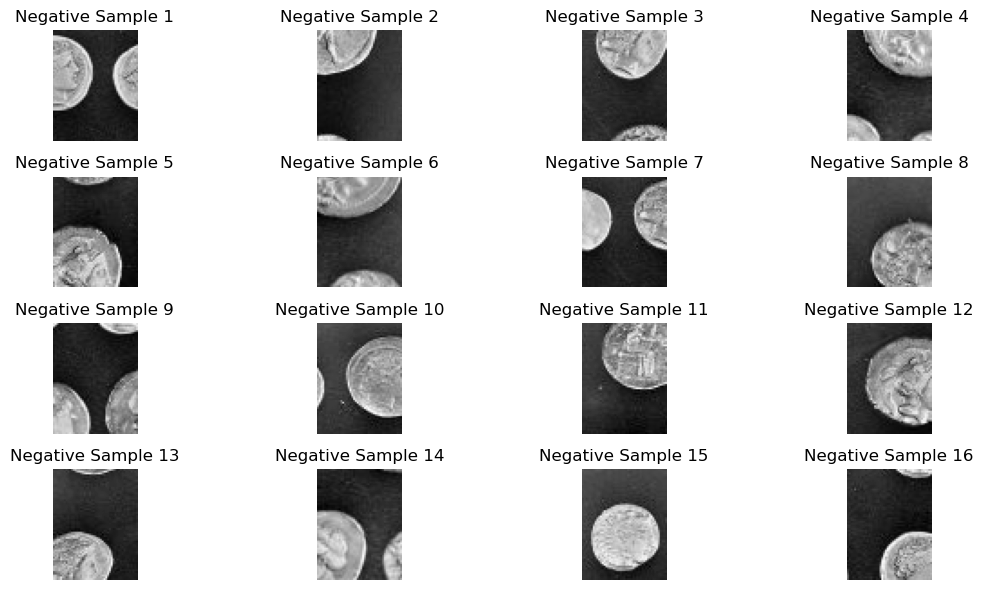

In [11]:
# Q5: Show some negative samples (e.g., 16)
plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(negative_patches[i], cmap='gray')
    plt.title(f"Negative Sample {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
# Q6: Combine negative and positive sets and extract HOG features
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import LabelEncoder

# Combine positive and negative patches
X = np.concatenate((positive_patches, negative_patches), axis=0)

# Extract HOG features for all samples
hog_features = []
for img in X:
    hog_vec, _ = feature.hog(img, visualize=True)
    hog_features.append(hog_vec)

X = np.array(hog_features)

In [13]:
# Q7: Construct vector of labels y
# Label 1 for positive samples and 0 for negative samples
positive_labels = np.ones(len(positive_patches))
negative_labels = np.zeros(len(negative_patches))
y = np.concatenate((positive_labels, negative_labels), axis=0)

# Shuffle the data and labels
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

In [14]:
#2.Binary Classification using Scikit-Learn

In [15]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# View the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1094, 1215), (274, 1215), (1094,), (274,))

### we build different binary classifiers with the best estimator for each one:

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

models = [
    {
        "estimator": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [5, 7, 9],
        }
    },
    {
        "estimator": DecisionTreeClassifier(),
        "params": {
            "max_depth": [90, 100],
        }
    },
    {
        "estimator": RandomForestClassifier(),
        "params": {
            "n_estimators": [80, 90, 100],
        }
    }
]

column_names = ["KNeighbors", "DecisionTree", "RF"]
entries = []
max_acc = 0
best_model = None

for model in models:
    print(model["estimator"])
    # Create model
    clf = model["estimator"]
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator=clf, param_grid=model["params"], cv=5)

    # Fit the model
    grid_search.fit(X_train, y_train)
    # Make predictions on the test set compute accuracy metric
    predicted = grid_search.predict(X_test)
    acc = accuracy_score(predicted, y_test)
    entries.append(acc)
    print(grid_search.best_params_)
    # Get the best model with the highest accuracy
    if acc > max_acc:
        max_acc = acc
        best_model = grid_search


KNeighborsClassifier()
{'n_neighbors': 7}
DecisionTreeClassifier()
{'max_depth': 100}
RandomForestClassifier()
{'n_estimators': 100}


### we plot each model performance:

      Estimator  Accuracy
0    KNeighbors  1.000000
1  DecisionTree  0.919708
2            RF  0.981752


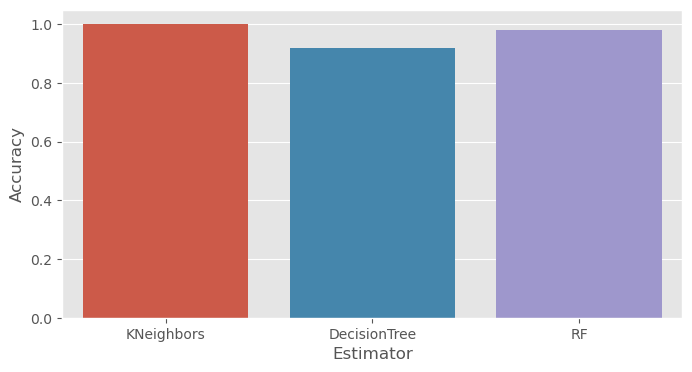

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.DataFrame({"Estimator": column_names, "Accuracy": entries})
plt.figure(figsize=(8, 4))
sns.barplot(x='Estimator', y='Accuracy', data=df)
print(df)


In [18]:
#Evaluating the Best Face Detector

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds):
    """ Performs evaluation comparison on y_true labels vs. y_pred labels on a classification. """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='micro')
    recall = recall_score(y_true, y_preds, average='micro')
    f1 = f1_score(y_true, y_preds, average='micro')
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    return metric_dict

In [20]:
#Make predictions using the test data to see how the best model performs by applying the evaluate_preds function.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Créez une instance de KNeighborsClassifier
best_model = KNeighborsClassifier(n_neighbors=5)  # Remplacez le nombre de voisins selon votre choix

# Ajustez le modèle avec les données d'entraînement (X_train et y_train)
best_model.fit(X_train, y_train)

# Utilisez le modèle ajusté pour faire des prédictions sur les données de test
y_preds = best_model.predict(X_test)

# Appelez la fonction evaluate_preds pour évaluer les performances
evaluation_results = evaluate_preds(y_test, y_preds)

# Imprimez les résultats de l'évaluation
print("Performance du modèle sur les données de test :")
print(evaluation_results)


Performance du modèle sur les données de test :
{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}


In [22]:
#Q10- Get a new test image by executing this script:

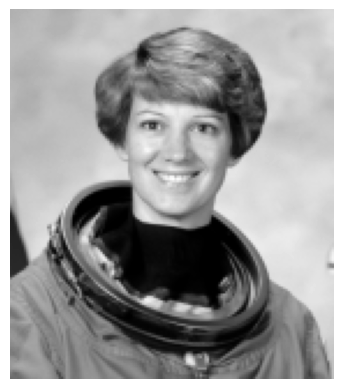

In [23]:
import skimage
from skimage import data, color, transform
test_image = skimage.data.astronaut()
test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]

plt.imshow(test_image, cmap='gray')
plt.axis('off');

In [24]:
#11- Create a window that iterates over patches of this image, and compute HOG features for each patch:

In [25]:
def sliding_window(img, patch_size=positive_patches[0].shape,
                   istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
                   

In [26]:
#Q12- Use our face detector to evaluate whether each patch contains a face. What do you notice?

In [27]:
from sklearn.linear_model import LogisticRegression

# Créez une instance du modèle LogisticRegression et ajustez-le avec des données d'entraînement
model = LogisticRegression()
model.fit(X_train, y_train)

# Faites des prédictions avec le modèle
labels = model.predict(patches_hog)

# Calculez la somme des étiquettes prédites
labels_sum = labels.sum()

In [28]:
#Q13- Draw face detected patches as rectangles:

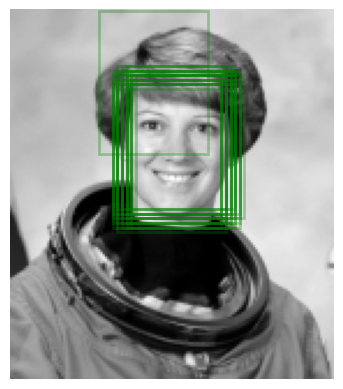

In [31]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray') 
ax.axis('off')
Ni, Nj = positive_patches[0].shape
indices = np.array(indices)
for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='green',
alpha=0.3, lw=2, facecolor='none'))

# save modele:

In [32]:
import joblib

# Assuming you have a trained model called 'model'
joblib.dump(best_model, 'face_detection_model.sav')  # Save the model to a file using joblib


['modelLab1.sav']

# l'emplacement de fichier modeleLab1

In [34]:
import os

# Obtenez le répertoire de travail actuel
current_directory = os.getcwd()

# Créez le chemin complet vers le fichier de modèle sauvegardé
model_file_path = os.path.join(current_directory, 'face_detection_model.sav')

print("Le modèle est sauvegardé ici:", model_file_path)


Le modèle est sauvegardé ici: C:\Users\dell\Desktop\Cours 3DNI\compter Vesion\modelLab1.sav


NameError: name 'streamlit' is not defined